In [112]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [113]:
# Load data
data = pd.read_csv("data/data.csv")

In [114]:
# Print head values and summary statistics
print(data.head())
print()
print(data.describe())
print()

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [115]:
labels = list(data.columns[:-1]) # Last element is the target column
values = list(data[labels].values)
targets = list(data["class"].values)
target_set = set(targets)

print(labels)
print(target_set)
print(values)
print(targets)


['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
{'Dropout', 'Enrolled

# Train test split

In [116]:
from sklearn.model_selection import train_test_split
def split_data(data, classes, test_size):
  data_train, data_test, target_train, target_test = train_test_split(data, classes, test_size=test_size, shuffle=False)
  return data_train, data_test, target_train, target_test


# Cross validation

In [117]:
from sklearn.model_selection import cross_val_score
def cross_validation(classifier, X, y, cv):
    scores = cross_val_score(classifier, X, y, cv=cv)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores


# Decision Tree Classifier

### Train and Score

In [124]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
clf = DecisionTreeClassifier(
  criterion="gini", # criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
  splitter="best", # splitter{“best”, “random”}, default=”best”
  max_depth=5, 
  max_features=None, # max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
  max_leaf_nodes=None) # max_leaf_nodes: int, default=None

data_train, data_test, target_train, target_test = split_data(values, targets, 0.80)

clf.fit(data_train, target_train)
score = clf.score(data_test, target_test)

print(score)
cross_validation(clf, values, targets, 5)

0.7081920903954803
0.74 accuracy with a standard deviation of 0.01


array([0.73785311, 0.75028249, 0.75141243, 0.75367232, 0.72737557])

### Plots

[Text(0.49489795918367346, 0.9166666666666666, 'X[30] <= 4.5\ngini = 0.599\nsamples = 884\nvalue = [252, 158, 474]'),
 Text(0.2653061224489796, 0.75, 'X[30] <= 1.5\ngini = 0.559\nsamples = 344\nvalue = [204, 89, 51]'),
 Text(0.11224489795918367, 0.5833333333333334, 'X[22] <= 0.5\ngini = 0.335\nsamples = 173\nvalue = [139, 19, 15]'),
 Text(0.04081632653061224, 0.4166666666666667, 'X[16] <= 0.5\ngini = 0.582\nsamples = 27\nvalue = [8, 4, 15]'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.061224489795918366, 0.25, 'X[9] <= 2.5\ngini = 0.514\nsamples = 23\nvalue = [4, 4, 15]'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.625\nsamples = 16\nvalue = [4, 4, 8]'),
 Text(0.1836734693877551, 0.4166666666666667, 'X[19] <= 18.5\ngini = 0.184\nsamples = 146\nvalue = [131, 15, 0]'),
 Text(0.14285714285714285, 0.25, 'X[33] <= 10.95\ngini = 0.49\nsamp

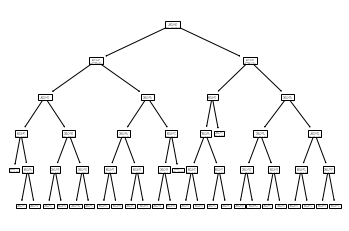

In [125]:
# Plot tree
from sklearn.tree import plot_tree
plot_tree(clf)

In [127]:
# Create PDF with the tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=labels, class_names=targets ) 
graph = graphviz.Source(dot_data) 
graph.render("decision_tree") 

'decision_tree.pdf'

# K-nearest Neighbour

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

data_train, data_test, target_train, target_test = split_data(values, targets, 0.80)

n_neighbors = 6

clf = neighbors.KNeighborsClassifier(n_neighbors,weights="uniform")
clf = clf.fit(data_train, target_train)
score = clf.score(data_test, target_test)

print(score)
cross_validation(clf, values, targets, 5)

0.5740112994350283
0.61 accuracy with a standard deviation of 0.01


array([0.6259887 , 0.60677966, 0.59774011, 0.59774011, 0.59954751])

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
'''
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X=np.array([line[:2] for line in data_train]),
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

sns.scatterplot(
        x=data[labels[0]],
        y=data[labels[1]],
        alpha=1.0,
        edgecolor="black",
    )
plt.show()
'''

'\n_, ax = plt.subplots()\nDecisionBoundaryDisplay.from_estimator(\n    clf,\n    X=np.array([line[:2] for line in data_train]),\n    ax=ax,\n    response_method="predict",\n    plot_method="pcolormesh",\n    shading="auto",\n)\n\nsns.scatterplot(\n        x=data[labels[0]],\n        y=data[labels[1]],\n        alpha=1.0,\n        edgecolor="black",\n    )\nplt.show()\n'

# Neural Network

In [132]:
from sklearn.neural_network import MLPClassifier

data_train, data_test, target_train, target_test = split_data(values, targets, 0.80)

clf = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(5, 2),
    max_iter=200,
    random_state=1)

clf.fit(data_train, target_train)
score = clf.score(data_test, target_test)

print(score)
cross_validation(clf, values, targets, 5)

0.4901129943502825
0.50 accuracy with a standard deviation of 0.00


array([0.49830508, 0.49943503, 0.49943503, 0.49943503, 0.5       ])